In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-whitegrid")

In [3]:
df = pd.read_csv("train_cleaned.csv")
df_copy = df.copy()

In [4]:
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,absent,Reg,Lvl,...,0,absent,absent,absent,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,absent,Reg,Lvl,...,0,absent,absent,absent,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,absent,IR1,Lvl,...,0,absent,absent,absent,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,absent,IR1,Lvl,...,0,absent,absent,absent,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,absent,IR1,Lvl,...,0,absent,absent,absent,0,12,2008,WD,Normal,250000


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,absent,Reg,Lvl,AllPub,...,0,absent,absent,absent,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,absent,Reg,Lvl,AllPub,...,0,absent,absent,absent,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,absent,IR1,Lvl,AllPub,...,0,absent,absent,absent,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,absent,IR1,Lvl,AllPub,...,0,absent,absent,absent,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,absent,IR1,Lvl,AllPub,...,0,absent,absent,absent,0,12,2008,WD,Normal,250000


In [7]:
df_original = df.copy()

In [8]:
df.set_index('Id').head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,absent,Reg,Lvl,AllPub,FR2,...,0,absent,absent,absent,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,absent,IR1,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,absent,IR1,Lvl,AllPub,Corner,...,0,absent,absent,absent,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,absent,IR1,Lvl,AllPub,FR2,...,0,absent,absent,absent,0,12,2008,WD,Normal,250000


In [9]:
df.shape

(1460, 81)

In [10]:
df.isna().sum()[0:60]

Id              0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional

In [11]:
df.isna().sum()[60:]

GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

## EDA 1

<Figure size 864x504 with 0 Axes>

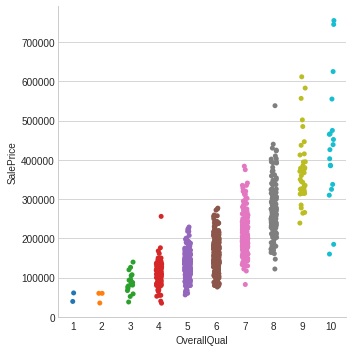

In [12]:
plt.figure(figsize = (12, 7))
sns.catplot(x = 'OverallQual', y = 'SalePrice', data = df,
            hue = 'OverallQual', height= 5, aspect = 1)
plt.show()

In [13]:
for col in df.select_dtypes(include=['object', 'category']):
    df[col], _ = df[col].factorize()
    
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,2,2006,0,1,140000
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,12,2008,0,0,250000


<Figure size 864x504 with 0 Axes>

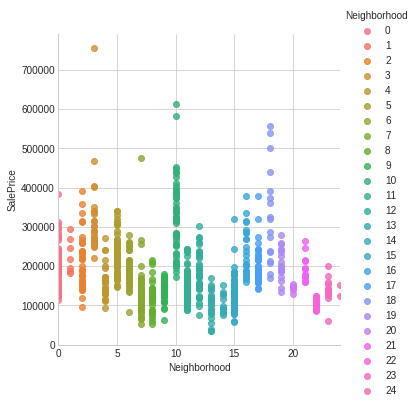

In [14]:
plt.figure(figsize = (12, 7))
sns.lmplot(x = 'Neighborhood', y = 'SalePrice', data = df.sample(1000), hue = 'Neighborhood')
plt.show()

<Figure size 864x504 with 0 Axes>

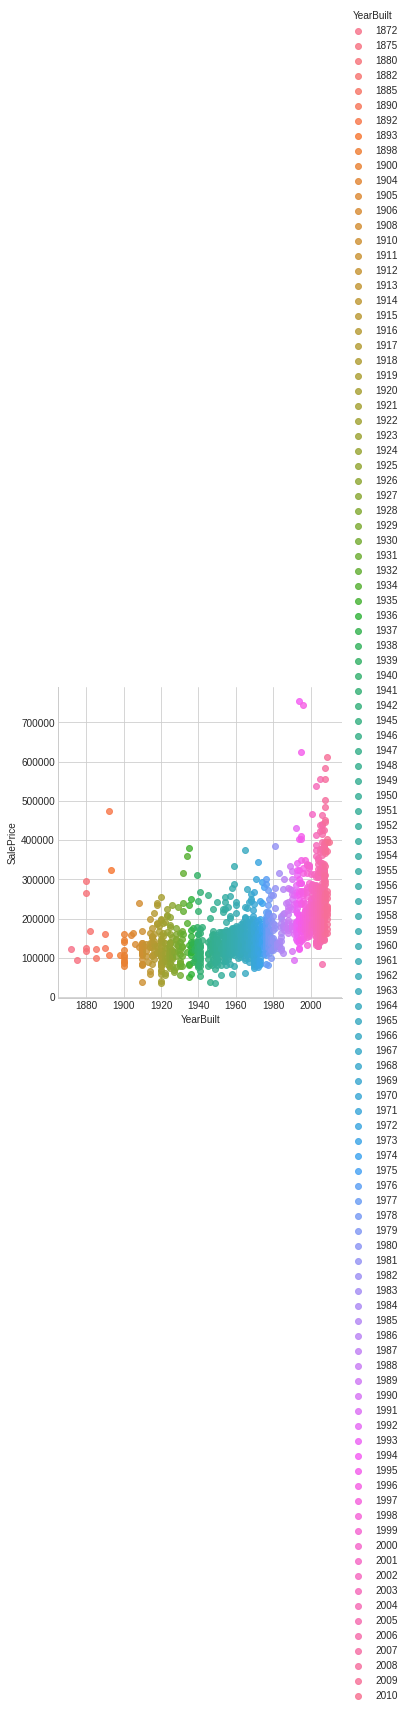

In [15]:
plt.figure(figsize = (12, 7))
sns.lmplot(x = 'YearBuilt', y = 'SalePrice', data = df, hue = "YearBuilt")

<Figure size 864x504 with 0 Axes>

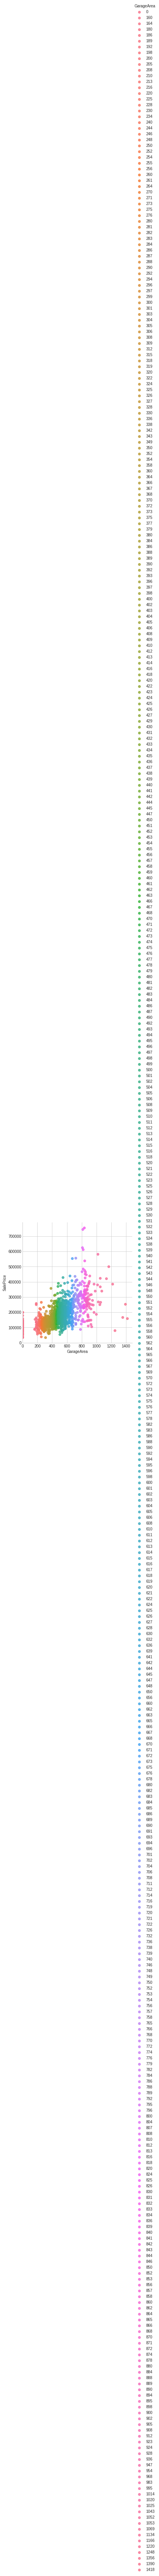

In [16]:
plt.figure(figsize = (12, 7))
sns.lmplot(x = "GarageArea", y = "SalePrice", data = df, hue = 'GarageArea')
plt.show()

## Correlation

In [17]:
corr = df.corr()

In [18]:
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.011949,-0.009601,-0.033226,-0.008916,-0.000293,-0.024071,0.014769,1.332409e-02,...,0.057044,0.066509,0.005029,-0.014074,-0.006242,0.021172,0.000712,-0.016932,-0.017712,-0.021917
MSSubClass,0.011156,1.000000,0.286937,-0.357056,-0.139781,0.024969,0.179144,-0.115361,-0.018947,-2.284384e-02,...,0.008283,0.010353,-0.080209,-0.016437,-0.007683,-0.013585,-0.021407,0.012874,-0.015047,-0.084284
MSZoning,-0.011949,0.286937,1.000000,-0.230394,-0.161640,0.039678,0.399270,-0.167918,-0.013396,-1.116745e-02,...,-0.029301,-0.027587,-0.074069,-0.029479,-0.021573,0.022231,-0.010621,0.058948,0.068705,-0.116047
LotFrontage,-0.009601,-0.357056,-0.230394,1.000000,0.306795,0.037323,-0.185163,0.197078,0.087767,5.171411e-18,...,0.180868,0.191209,0.034020,0.006921,0.001168,0.010158,0.006768,0.006126,0.068921,0.334901
LotArea,-0.033226,-0.139781,-0.161640,0.306795,1.000000,0.197131,-0.083668,0.315484,0.258792,1.012318e-02,...,0.077672,0.093908,-0.030856,0.089707,0.038068,0.001205,-0.014261,-0.013882,0.000199,0.263843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.021172,-0.013585,0.022231,0.010158,0.001205,-0.003690,-0.021453,0.026617,0.063280,-5.155166e-02,...,-0.033737,-0.033227,0.011360,0.019292,-0.006495,1.000000,-0.145721,0.040201,0.054679,0.046432
YrSold,0.000712,-0.021407,-0.010621,0.006768,-0.014261,0.025043,-0.012036,-0.037391,-0.026117,2.335254e-02,...,-0.059689,-0.046232,0.012714,0.043235,0.004906,-0.145721,1.000000,-0.021683,-0.123720,-0.028923
SaleType,-0.016932,0.012874,0.058948,0.006126,-0.013882,0.021171,-0.000025,0.001435,-0.014537,5.745504e-02,...,-0.009887,-0.002809,-0.027036,0.014543,-0.014143,0.040201,-0.021683,1.000000,0.232149,0.072896
SaleCondition,-0.017712,-0.015047,0.068705,0.068921,0.000199,0.022919,0.026551,-0.004773,0.062826,1.917277e-02,...,0.068578,0.071651,-0.032209,-0.047231,-0.032655,0.054679,-0.123720,0.232149,1.000000,0.142503


## To most 10 correlations

In [19]:
corr.index

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [20]:
corr.style.background_gradient(cmap = "coolwarm")

In [21]:
most_corrs = corr.index[abs(corr['SalePrice']) >= 0.5]
most_corrs

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

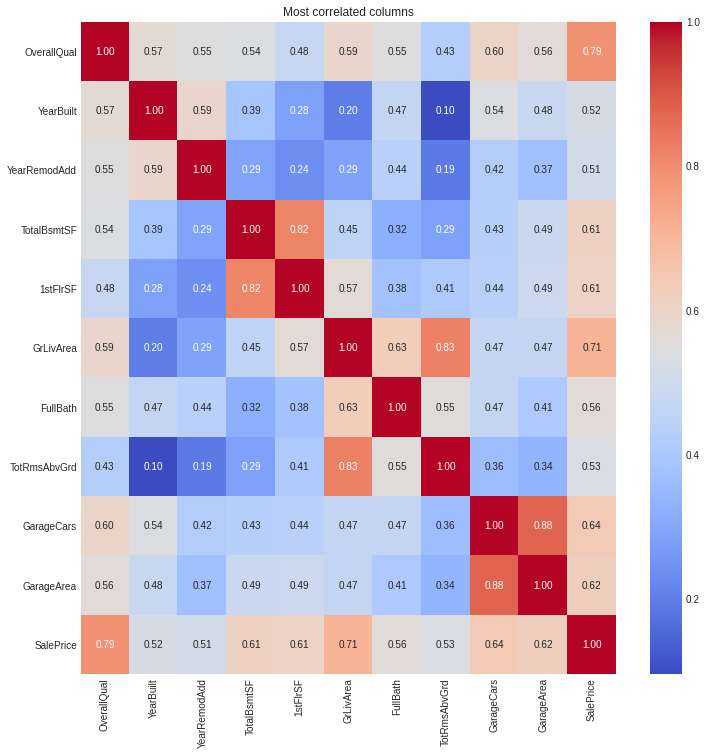

In [22]:
plt.figure(figsize = (12, 12))
sns.heatmap(df[most_corrs].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title("Most correlated columns")
plt.show()

Some features obtained from MIG are not in the correlation coefficients, this means you can find the values from both sides manually and decide to use it in your final dataset.

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

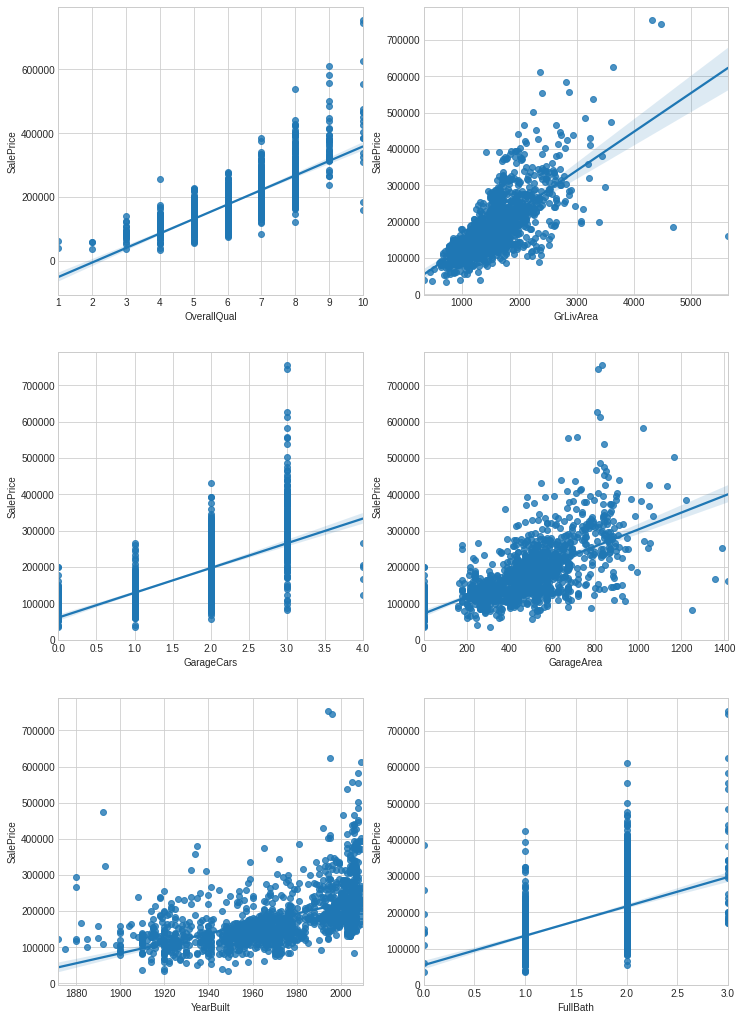

In [23]:
fig, axes = plt.subplots(3, 2, figsize = (12, 18))

sns.regplot(ax = axes[0, 0], x = 'OverallQual',  y = 'SalePrice', data = df)
sns.regplot(ax = axes[0, 1], x = 'GrLivArea', y = 'SalePrice', data = df)
sns.regplot(ax = axes[1, 0], x = 'GarageCars', y ='SalePrice', data = df)
sns.regplot(ax = axes[1, 1], x = 'GarageArea', y ='SalePrice', data = df)
sns.regplot(ax = axes[2, 0], x = 'YearBuilt', y ='SalePrice', data = df)
sns.regplot(ax = axes[2, 1], x = 'FullBath', y ='SalePrice', data = df)

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

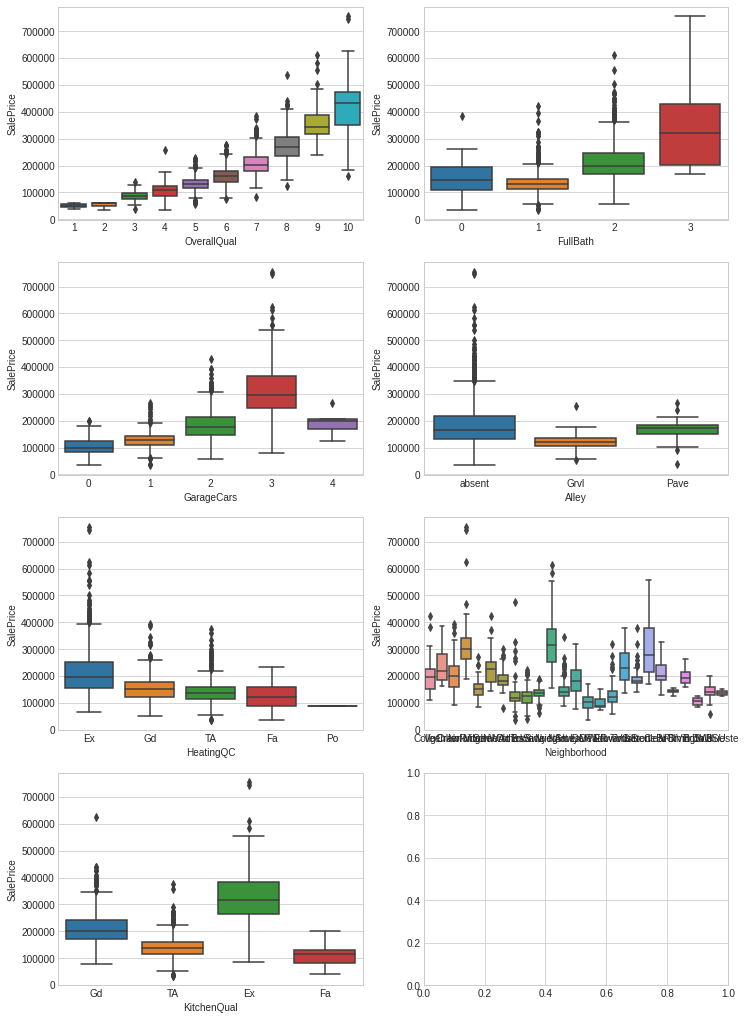

In [24]:
fig, axes = plt.subplots(4, 2, figsize = (12, 18))

sns.boxplot(ax = axes[0, 0], x = 'OverallQual', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[0, 1], x = 'FullBath', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[1, 0], x = 'GarageCars', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[1, 1], x = 'Alley', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[2, 0], x = 'HeatingQC', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[2, 1], x = 'Neighborhood', y = 'SalePrice', data = df_copy)
sns.boxplot(ax = axes[3, 0], x = 'KitchenQual', y = 'SalePrice', data = df_copy)

## Price and OverallQaul Distribution

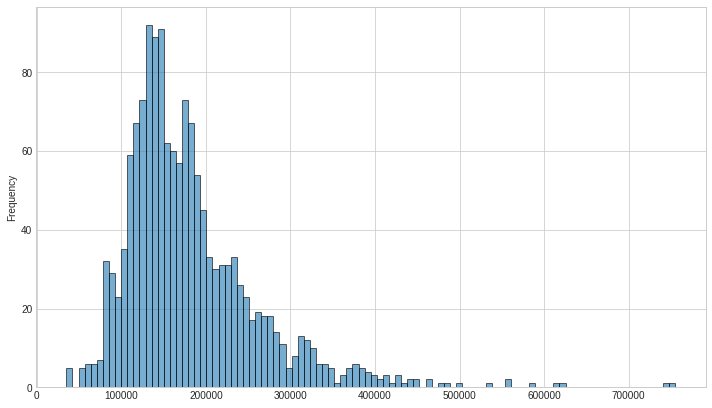

In [25]:
plt.figure(figsize = (12, 7))
df['SalePrice'].plot.hist(bins = 100, alpha=0.6, edgecolor = 'k')
plt.show()

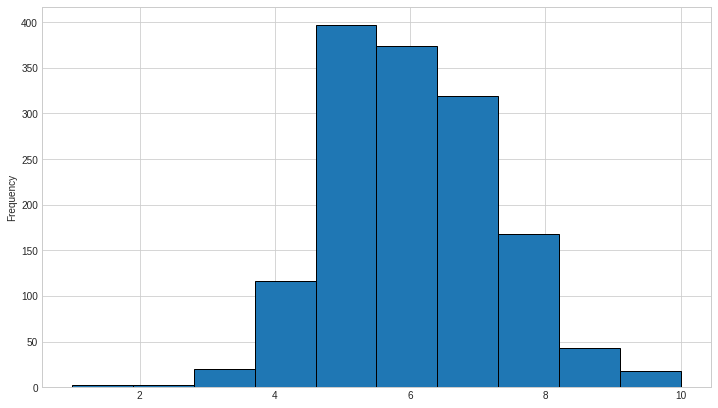

In [26]:
plt.figure(figsize = (12, 7))
df['OverallQual'].plot.hist(edgecolor = "k")
plt.show()

In [27]:
from scipy import stats

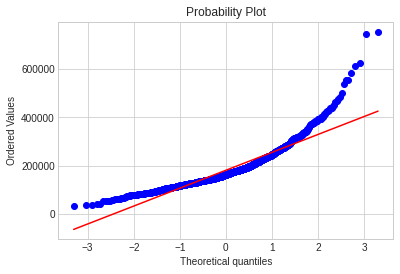

In [28]:
res = stats.probplot(df['SalePrice'], plot = plt)

## OutLier Detection And Removal

In [29]:
df_copy.drop("Unnamed: 0", axis = 1, inplace = True)
df_copy = df_copy.set_index('Id')
df_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,absent,Reg,Lvl,AllPub,FR2,...,0,absent,absent,absent,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,absent,IR1,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,absent,IR1,Lvl,AllPub,Corner,...,0,absent,absent,absent,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,absent,IR1,Lvl,AllPub,FR2,...,0,absent,absent,absent,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,MnPrv,absent,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [30]:
df_copy.shape

(1460, 80)

In [31]:
df_copy.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [32]:
outlier_removed_df = df_copy.copy()

for col in df_copy.select_dtypes(include = ['int64', 'float64']):
    if col == 'YrSold':
        continue
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_removed_df= \
    outlier_removed_df[outlier_removed_df[col].between((Q1 - 1.5 * IQR) ,(Q3 + 1.5 * IQR))]
    
outlier_removed_df.min()

MSSubClass            20
MSZoning              FV
LotFrontage           32
LotArea             2887
Street              Grvl
                  ...   
MoSold                 1
YrSold              2006
SaleType             COD
SaleCondition    Abnorml
SalePrice          37900
Length: 80, dtype: object

In [33]:
outlier_removed_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,2,2008,WD,Normal,208500
3,60,RL,68.0,11250,Pave,absent,IR1,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,absent,IR1,Lvl,AllPub,FR2,...,0,absent,absent,absent,0,12,2008,WD,Normal,250000
7,20,RL,75.0,10084,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,8,2007,WD,Normal,307000
11,20,RL,70.0,11200,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,2,2008,WD,Normal,129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,50,RL,70.0,11767,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,GdWo,absent,0,5,2007,WD,Normal,112000
1452,20,RL,78.0,9262,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,5,2009,New,Partial,287090
1454,20,RL,90.0,17217,Pave,absent,Reg,Lvl,AllPub,Inside,...,0,absent,absent,absent,0,7,2006,WD,Abnorml,84500


In [34]:
outlier_removed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,558.0,48.924731,31.526252,20.0,20.00,50.000000,60.00,120.0
LotFrontage,558.0,68.677949,13.181510,32.0,61.00,70.049958,75.00,107.0
LotArea,558.0,9219.096774,2722.375625,2887.0,7744.00,9027.500000,10800.00,17600.0
OverallQual,558.0,6.241935,1.247143,2.0,5.00,6.000000,7.00,10.0
OverallCond,558.0,5.369176,0.706408,4.0,5.00,5.000000,6.00,7.0
YearBuilt,558.0,1983.338710,25.051508,1910.0,1965.25,1995.500000,2004.00,2009.0
YearRemodAdd,558.0,1989.164875,19.614363,1950.0,1972.00,1999.000000,2005.00,2010.0
MasVnrArea,558.0,74.293907,105.872046,0.0,0.00,0.000000,143.00,415.0
BsmtFinSF1,558.0,444.345878,408.534751,0.0,0.00,442.000000,745.00,1619.0
BsmtFinSF2,558.0,0.000000,0.000000,0.0,0.00,0.000000,0.00,0.0


In [35]:
for col in outlier_removed_df.select_dtypes(include = ['category', 'object']):
    outlier_removed_df[col], _ = outlier_removed_df[col].factorize()

In [36]:
outlier_removed_df.shape

(558, 80)

## Feature Engineering

### Mutual Information Gain

In [37]:
from sklearn.feature_selection import mutual_info_regression

In [38]:
def generate_mi_scores(X, y):
    X = X.copy()
    for col in X.select_dtypes(include = ['object', 'category']):
        X[col], _ = X[col].factorize()
        
    discrete_features = [pd.api.types.is_integer_dtype(col) for col in X.columns]
    mi_scores = mutual_info_regression(X, y, discrete_features = discrete_features, random_state = 0)
    mi_scores = pd.Series(mi_scores, name = 'MI_scores', index = X.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores


def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending=True)
    width = np.arange(len(mi_scores))
    tick_labels = list(mi_scores.index)
    plt.barh(width, mi_scores, color = 'blue')
    plt.yticks(width, tick_labels)
    plt.show()

In [39]:
X = df.copy()
y = X.pop('SalePrice')
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,0,0,2,2008,0,0
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,0,0,5,2007,0,0
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,0,0,9,2008,0,0
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,0,0,2,2006,0,1
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,0,62.0,7917,0,0,0,0,0,...,0,0,0,0,0,0,8,2007,0,0
1456,1457,20,0,85.0,13175,0,0,0,0,0,...,0,0,0,1,0,0,2,2010,0,0
1457,1458,70,0,66.0,9042,0,0,0,0,0,...,0,0,0,3,1,2500,5,2010,0,0
1458,1459,20,0,68.0,9717,0,0,0,0,0,...,0,0,0,0,0,0,4,2010,0,0


In [40]:
mi_scores = generate_mi_scores(X, y)

In [41]:
mi_scores[:20]

OverallQual     0.562351
Neighborhood    0.494272
GrLivArea       0.484079
YearBuilt       0.370343
GarageCars      0.368134
TotalBsmtSF     0.366474
GarageArea      0.362922
KitchenQual     0.333339
ExterQual       0.327906
BsmtQual        0.320842
1stFlrSF        0.311303
GarageYrBlt     0.295891
FullBath        0.280077
GarageFinish    0.270083
MSSubClass      0.268300
YearRemodAdd    0.249713
TotRmsAbvGrd    0.223299
FireplaceQu     0.205559
GarageType      0.203703
2ndFlrSF        0.199054
Name: MI_scores, dtype: float64

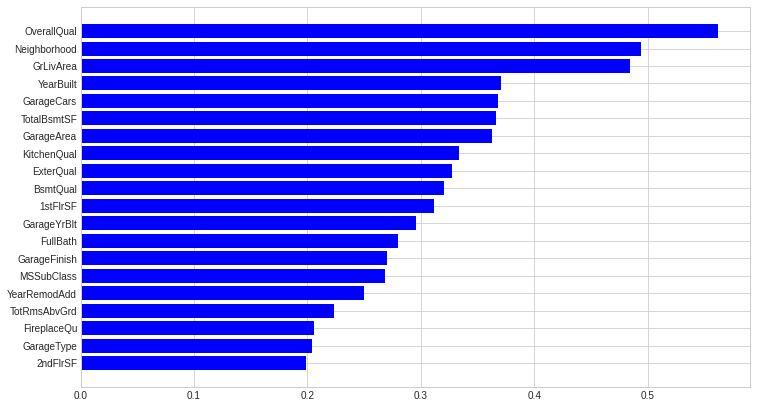

In [42]:
plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores[:20])

### K-Means

In [43]:
from sklearn.cluster import KMeans

In [44]:
X = df.loc[:, ['KitchenQual', 'GarageArea']]

In [45]:
kmeans = KMeans(n_clusters = 6)

In [46]:
X['cluster'] = kmeans.fit_predict(X)

<Figure size 864x504 with 0 Axes>

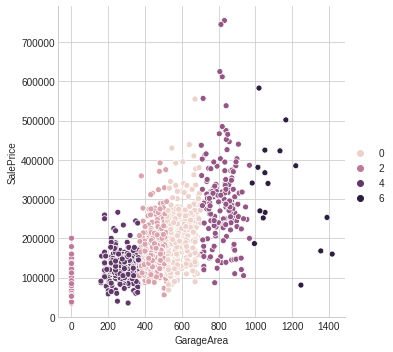

In [47]:
plt.figure(figsize = (12, 7))
sns.relplot(x = 'GarageArea', y = 'SalePrice', data = df, hue = X['cluster'].tolist())
plt.show()

<Figure size 864x504 with 0 Axes>

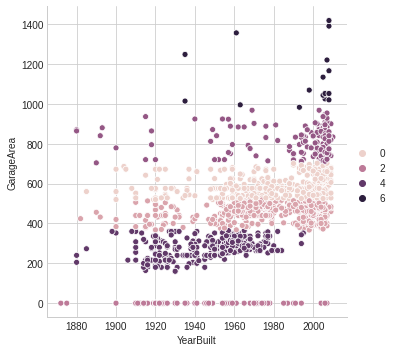

In [48]:
plt.figure(figsize = (12, 7))
sns.relplot(x = 'YearBuilt', y = 'GarageArea', data = df, hue = X['cluster'].tolist())
plt.show()

<Figure size 864x504 with 0 Axes>

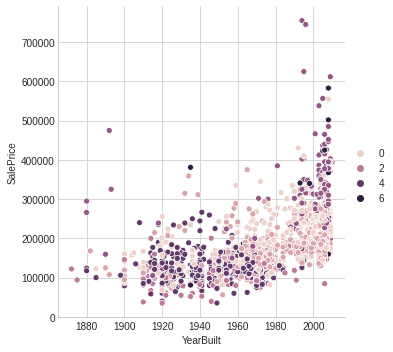

In [49]:
plt.figure(figsize = (12, 7))
sns.relplot(x = 'YearBuilt', y = 'SalePrice', data = df, hue = X['cluster'].tolist())
plt.show()

### New Features

In [50]:
feature_engineering_df = df.copy()

In [51]:
feature_engineering_df[['OverallQual', 'Neighborhood', 'GrLivArea']]

,OverallQual,Neighborhood,GrLivArea
0,7,0,1710
1,6,1,1262
2,7,0,1786
3,7,2,1717
4,8,3,2198
...,...,...,...
1455,6,17,1647
1456,6,6,2073
1457,7,2,2340
1458,5,11,1078


In [52]:
feature_engineering_df['OverallQual_Neighborhood_GrLivArea'] = feature_engineering_df['OverallQual'] \
                                 + feature_engineering_df['Neighborhood'] + feature_engineering_df['GrLivArea']

feature_engineering_df['GarageArea_GarageCars'] = \
                            feature_engineering_df['GarageArea'] * feature_engineering_df['GarageCars'] + \
                                                                            feature_engineering_df['GarageYrBlt']

feature_engineering_df['YearBuilt_YearRemodAdd'] = \
                                    feature_engineering_df['YearBuilt'] * feature_engineering_df['YearRemodAdd']

feature_engineering_df['KitchenQual_ExterQual_BsmtQual'] = \
                                    feature_engineering_df['KitchenQual'] + feature_engineering_df['ExterQual'] + \
                                                                                feature_engineering_df['BsmtQual']
feature_engineering_df['TotalBathrooms'] = (feature_engineering_df['FullBath'] + (0.5 * feature_engineering_df['HalfBath']) +
                               feature_engineering_df['BsmtFullBath'] + (0.5 * feature_engineering_df['BsmtHalfBath']))

feature_engineering_df['TotalPorchSF'] = (feature_engineering_df['OpenPorchSF'] + feature_engineering_df['3SsnPorch'] +
                              feature_engineering_df['EnclosedPorch'] + all_data['ScreenPorch'] +
                              feature_engineering_df['WoodDeckSF'])

In [53]:
X = feature_engineering_df.copy()
y = X.pop('SalePrice')
mi_scores = generate_mi_scores(X, y)

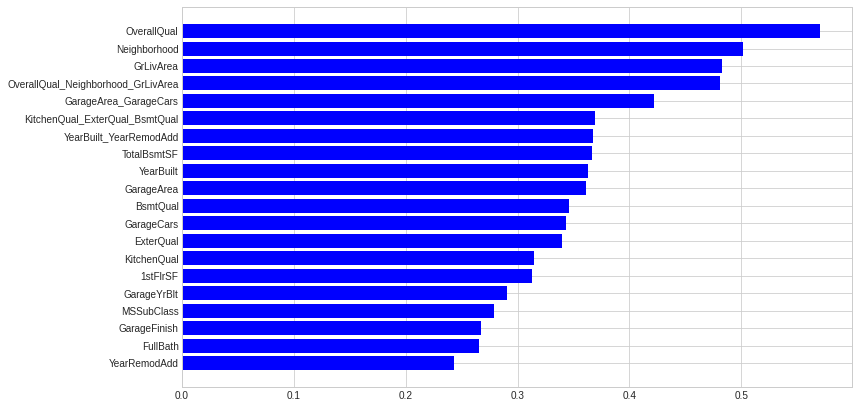

In [54]:
plt.figure(figsize = (12, 7))
plot_mi_scores(mi_scores[:20])

In [55]:
list(mi_scores.index[:20])

['OverallQual',
 'Neighborhood',
 'GrLivArea',
 'OverallQual_Neighborhood_GrLivArea',
 'GarageArea_GarageCars',
 'KitchenQual_ExterQual_BsmtQual',
 'YearBuilt_YearRemodAdd',
 'TotalBsmtSF',
 'YearBuilt',
 'GarageArea',
 'BsmtQual',
 'GarageCars',
 'ExterQual',
 'KitchenQual',
 '1stFlrSF',
 'GarageYrBlt',
 'MSSubClass',
 'GarageFinish',
 'FullBath',
 'YearRemodAdd']

## Model Selection

#### Models in mind

1. Linear regression model
2. Lasso regression
3. Ridge regressoin
4. XGBoost

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [57]:
kf = KFold(n_splits=5)

In [58]:
models = {

    'linear Reg': {
        'model' : LinearRegression(),
        'params': {}
    },
    'lasso': {
        'model': Lasso(max_iter = 5000000, normalize=True),
        'params': {
            'alpha' : [0.7, 0.8, 0.4, 0.6],
            'precompute': [True, False],
            'warm_start': [True, False],
            'selection' : ['cyclic', 'random']
        }
    },
    'Ridge':{
        'model': Ridge(max_iter = 70000),
        'params': {
            'alpha' : [0.7, 0.8, 0.4, 0.6],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
        }
    },
    'XGBoostRegressor':{
        'model': XGBRegressor(),
        'params': {}
    },
    'GradientBoostingRegressor':{
        'model': GradientBoostingRegressor(),
        'params': {
            'loss' : ['ls', 'lad', 'huber', 'quantile'],
            'n_estimators' : [20500, 100, 250, 100, 3300, 2000, 30000],
            'subsample' : [0.5, 0.38, 1, 2]
        }
    },
    'RandomForestRegressor':{
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators' : [200, 100, 50, 300, 250],
            'bootstrap' : [True, False]
        }
    }
}

In [59]:
def generate_model_report(models, X_col_original, y_col_original):
    results = []
    for model, model_params in models.items():
        my_model = GridSearchCV(model_params['model'], model_params['params'], cv=kf)
        my_model.fit(X_col_original, y_col_original)
        results.append({
            'model name': model,
            'best score': my_model.best_score_,
            'best params': my_model.best_params_
        })
    return results

### Unclean Original Data

In [60]:
X_col_original = df.drop(['SalePrice', 'Id'], axis = 1)
y_col_original = df['SalePrice']
X_col_original

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,0,2,2008,0,0
1,20,0,80.0,9600,0,0,0,0,0,1,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,0,9,2008,0,0
3,70,0,60.0,9550,0,0,1,0,0,2,...,0,0,0,0,0,0,2,2006,0,1
4,60,0,84.0,14260,0,0,1,0,0,1,...,0,0,0,0,0,0,12,2008,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,0,8,2007,0,0
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,1,0,0,2,2010,0,0
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,3,1,2500,5,2010,0,0
1458,20,0,68.0,9717,0,0,0,0,0,0,...,0,0,0,0,0,0,4,2010,0,0


In [61]:
results_df = pd.DataFrame(generate_model_report(models, X_col_original, y_col_original))
results_df

/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 251, in _check_params
    raise ValueError("subsample must be in (0,1] but "
ValueError: subsample must be in (0,1] but was 2

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on t

/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 251, in _check_params
    raise ValueError("subsample must be in (0,1] but "
ValueError: subsample must be in (0,1] but was 2

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on t

/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 441, in fit
    self._check_params()
  File "/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 251, in _check_params
    raise ValueError("subsample must be in (0,1] but "
ValueError: subsample must be in (0,1] but was 2

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/prince/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on t

KeyboardInterrupt: 

### Outlier Removed

In [ ]:
X_col_outlierRemoved  = outlier_removed_df.drop(['SalePrice'], axis = 1)
y_col_outlierRemoved = outlier_removed_df['SalePrice']
X_col_outlierRemoved.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')

result = generate_model_report(models, X_col_outlierRemoved, y_col_outlierRemoved)
results_df = pd.DataFrame(result)
results_df

### Feature Engineered

In [ ]:
X_col_featureEngineered  = feature_engineering_df.drop(['SalePrice', 'Id'], axis = 1)
X_col_featureEngineered = X_col_featureEngineered[list(set(mi_scores.index[:20], most_corrs))]
y_col_featureEngineered = feature_engineering_df['SalePrice']
X_col_featureEngineered

In [ ]:
import warnings
warnings.filterwarnings('ignore')

result = generate_model_report(models, X_col_featureEngineered, y_col_featureEngineered)
results_df = pd.DataFrame(result)
results_df

In [ ]:
X_col_featureEngineered_full  = feature_engineering_df.drop(['SalePrice', 'Id'], axis = 1)
y_col_featureEngineered_full = feature_engineering_df['SalePrice']
X_col_featureEngineered_full

In [ ]:
import warnings
warnings.filterwarnings('ignore')

result = generate_model_report(models, X_col_featureEngineered_full, y_col_featureEngineered_full)
results_df = pd.DataFrame(result)
results_df

### Featured Engineered With No Outliers

In [ ]:
'Unnamed: 0' in feature_engineering_df.columns

In [ ]:
feature_engineered_with_no_outliers = feature_engineering_df.copy()

for col in df_copy.select_dtypes(include = ['int64', 'float64']):
    if col == 'YrSold':
        continue
    Q1 = df_copy[col].quantile(0.05)
    Q3 = df_copy[col].quantile(0.99)
    IQR = Q3 - Q1
    feature_engineered_with_no_outliers= \
    feature_engineered_with_no_outliers[feature_engineered_with_no_outliers[col].\
                                        between((Q1 - 1.5 * IQR) ,(Q3 + 1.5 * IQR))]
    
feature_engineered_with_no_outliers.drop(["Id"], axis = 1, inplace = True)

In [ ]:
X_col_featureEngineered_no_outlier  = feature_engineered_with_no_outliers.drop(['SalePrice'], axis = 1)
X_col_featureEngineered_no_outlier =  X_col_featureEngineered_no_outlier[list(mi_scores.index[:20])]
y_col_featureEngineered_no_outlier = feature_engineered_with_no_outliers['SalePrice']
X_col_featureEngineered_no_outlier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

result = generate_model_report(models, X_col_featureEngineered_no_outlier, y_col_featureEngineered_no_outlier)
results_df = pd.DataFrame(result)
results_df

## Best Model


The best model is the Ridge regression with the cleaned-feature-engineered-outlier-removed dataset

In [ ]:
final_model = GradientBoostingRegressor(loss = 'lad' , n_estimators=2501,
                                      learning_rate= 0.03221041191991256,)

In [ ]:
feature_engineered_with_no_outliers

In [ ]:
X_col_featureEngineered_no_outlier = feature_engineered_with_no_outliers.drop(['SalePrice'], axis = 1)
                                                                                   
# X_col_featureEngineered_no_outlier = X_col_featureEngineered_no_outlier [list(mi_scores.index[:30])]
y_col_featureEngineered_no_outlier =  feature_engineered_with_no_outliers['SalePrice']

In [ ]:
final_model.fit(X_col_featureEngineered_no_outlier,
                y_col_featureEngineered_no_outlier)

In [ ]:
df_test = pd.read_csv("test_cleaned.csv")
df_test.shape

In [ ]:
df_test_original = df_test.copy()

In [ ]:
for col in df_test.select_dtypes(include = ['object', 'category']):
    df_test[col], _ = df_test[col].factorize()
    
df_test = df_test.drop(['Id'], axis = 1)

In [ ]:
df_test['OverallQual_Neighborhood_GrLivArea'] = df_test['OverallQual'] + df_test['Neighborhood'] + df_test['GrLivArea']

df_test['GarageArea_GarageCars'] = df_test['GarageArea'] * df_test['GarageCars'] + df_test['GarageYrBlt'] 

df_test['YearBuilt_YearRemodAdd'] = df_test['YearBuilt'] * df_test['YearRemodAdd']

df_test['KitchenQual_ExterQual_BsmtQual'] = df_test['KitchenQual'] + df_test['ExterQual'] + df_test['BsmtQual']

df_test['TotalBathrooms'] = (df_test['FullBath'] + (0.5 * df_test['HalfBath']) +
                               df_test['BsmtFullBath'] + (0.5 * df_test['BsmtHalfBath']))

df_test['TotalPorchSF'] = (df_test['OpenPorchSF'] + df_test['3SsnPorch'] +
                              df_test['EnclosedPorch'] + df_test['ScreenPorch'] +
                              df_test['WoodDeckSF'])

In [ ]:
filename = "serialized_model"

import pickle

outfile = open(filename, 'wb')

pickle.dump(final_model, outfile)

outfile.close()

In [ ]:
infile = open(filename, 'rb')

model = pickle.load(infile)

In [ ]:
predicted_prices = model.predict(df_test)

In [ ]:
submission_df = pd.DataFrame({"Id" : df_test_original.Id, "SalePrice" : predicted_prices})

In [ ]:
submission_df.to_csv("submissionFile.csv", index = False)

In [ ]:
test_df = pd.read_csv("submissionFile.csv")

In [ ]:
test_df